# Statistics in Python - A minimal primer

By: Emil Ljungberg, Dept. Medical Radiation Physics, Lund University, 2024

Libraries to know about
- `pandas`: Library for working with tabular data, very similar to R. ([Online doc](https://pandas.pydata.org))
- `seaborn`: Visualization library built on top of matplotlib to make it very easy to work plot tabular data ([Online doc](https://seaborn.pydata.org))

In this super short tutorial we will use the [iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to show how to use Pandas and Seaborn. After this, you will have the tools to do the exercises in the Biostatistics course.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme() # This is to get pretty plots

df = sns.load_dataset('iris') # Iris comes as a dataset in seaborn. This returns a pandas dataframe

## Pandas
The base object is a Dataframe (typically called `df`) which contains rows and columns as shown below. You can read data from files (like excel, csv) into dataframes, and vice versa.

![Alt Text](https://pandas.pydata.org/docs/_images/01_table_dataframe.svg)

To print the first few rows of our Iris dataset we write

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


This dataset follows the "[tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html#:~:text=Tidy%20data%20is%20a%20standard,Every%20row%20is%20an%20observation.)" format where each row is an observation and each column is a descriptive variable. I highly recommend this for your own data.

The dataset contains a few numeric veriables and one that is listed as strings. We can show the datatypes of each column

In [13]:
print(df.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


To select a column we use the same notation as for python dictionaries. 

In [14]:
df['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

We can also use the value of a column as a filter. If we look at the `species` column, it has a few different unique values. To filter out the ones called "versicolor" we write

In [15]:
df[df['species'] == 'versicolor'].head() # using .head() prints only the first few rows

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


We can run summary statistics on a data frame. For instance using the `describe()` function

In [16]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


For the numeric columns (shown above), we can apply standard statistics functions as well

In [17]:
col = 'sepal_length'
print(f'mean: {df[col].mean()}')
print(f'median: {df[col].median()}')
print(f'std: {df[col].std()}')
print(f'min: {df[col].min()}')
print(f'max: {df[col].max()}')

mean: 5.843333333333334
median: 5.8
std: 0.828066127977863
min: 4.3
max: 7.9


For the categorial column species we cannot apply these operators, but we can look at which values it takes and what the mode is.

In [18]:
col = 'species'
print(f'Unique values: {df[col].unique()}')
print(f'Mode: {df[col].mode()}')

Unique values: ['setosa' 'versicolor' 'virginica']
Mode: 0        setosa
1    versicolor
2     virginica
Name: species, dtype: object


There is A LOT more you can do with dataframes and pandas, but now we will focus on just visualization with seaborn. When the data is organized in dataframe like this, it is very easy to plot it with seaborn. And we can use the columns for grouping our data in different ways.

# Seaborn plotting
Seaborn (typically imported as `sns`) is built for plotting data in dataframes and with the right organisation it is a breeze to produce nice plots. Some useful plots to know about

- `scatterplot`: Your typical scatter plot.
- `lineplot`: Line plot for data with a dependent variable, like time.
- `histplot`: Histogram.
- `boxplot`: Boxes
- `violinplot`: Violins

The typical format here is that you supply the function with `data=df` and then the options `x` and `y` are given the columns in your dataset that should be plotted. In the iris dataset we could plot `x='sepal_length'` vs `y='sepal_width'` as a scatter plot for instance. But here we also have information about which species the measurements belong to. Then we can use the `hue` option (means color) to color the datapoints based on the species with `hue='species'`.

Let's start with the histogram

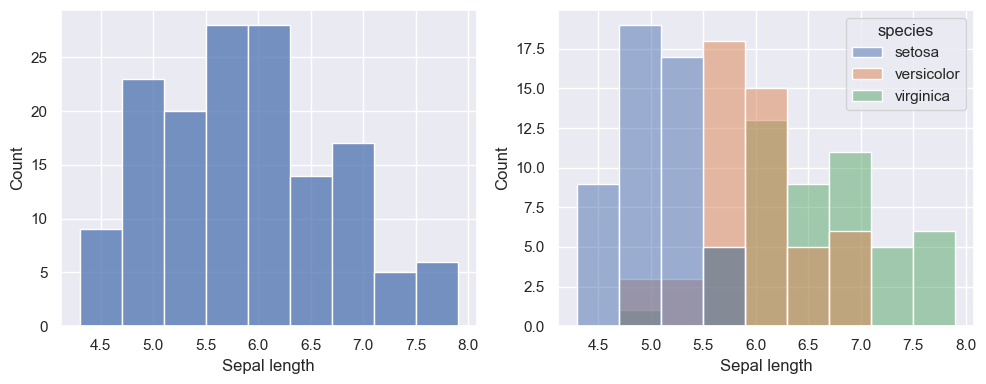

In [19]:
# Create the figure object
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))  

# Here I use the ax parameter to specify where I want to do the plot
# The axes variable is a list of axes that were created
sns.histplot(data=df, x='sepal_length', ax=axes[0])
axes[0].set_xlabel('Sepal length')

# Now we add in the hue option
sns.histplot(data=df, x='sepal_length', hue='species', ax=axes[1])
axes[1].set_xlabel('Sepal length')

plt.tight_layout()

Example with scatter plot

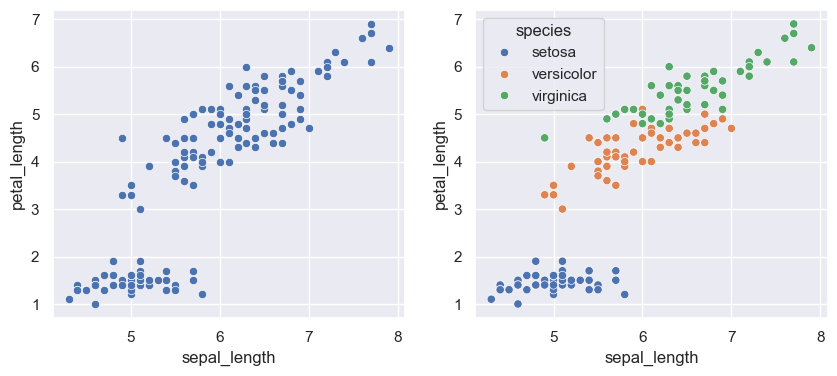

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

sns.scatterplot(data=df, x='sepal_length', y='petal_length', ax=axes[0])
sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='species', ax=axes[1])

plt.show()

Bar, box, violin and swarm plots.

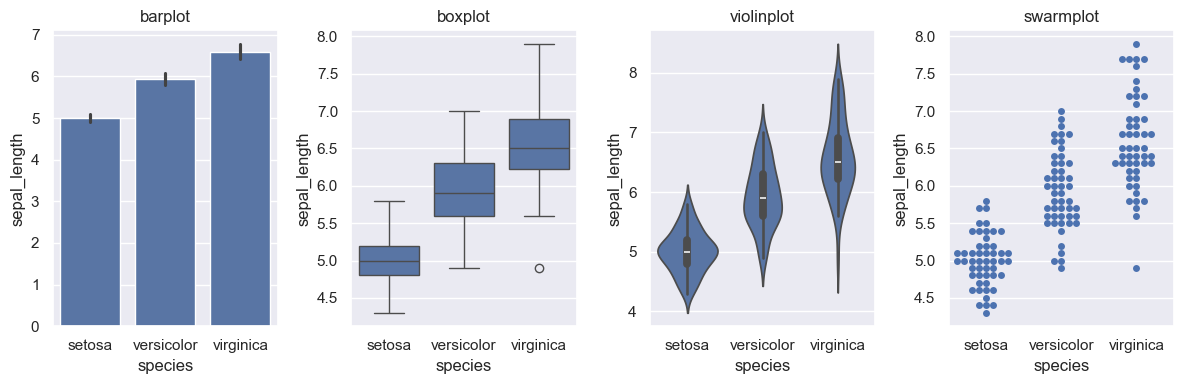

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,4))

sns.barplot(data=df, y='sepal_length', x='species', ax=axes[0]); axes[0].set_title('barplot')
sns.boxplot(data=df, y='sepal_length', x='species', ax=axes[1]); axes[1].set_title('boxplot')
sns.violinplot(data=df, y='sepal_length', x='species', ax=axes[2]); axes[2].set_title('violinplot')
sns.swarmplot(data=df, y='sepal_length', x='species', ax=axes[3]); axes[3].set_title('swarmplot')

plt.tight_layout()

## Advanced level - reshaping data
A really powerful, and many times complicated, feature in pandas is how to reshape a dataframe into a different format. Say that we want to make a violin plot with the four different measures on the x-axis and have the species as groups next to eachother? Then we want to reformat the dataframe to have just one numeric column with the measurement, and a new column which indicates which measure that value is associated with, as well as the species. For this we use the `melt()` function.

Here we need to specify two things, the `ids` and the `values`.

- The `value_vars` are the columns that contain the values we want to use, i.e., the numeric values. Here, this would be `value_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']`
- The `id_vars` are other columns we want to keep which contain some type of label of the datapoint, here it would be `id_vars=['species']`.
- The `value_name` is the name of the new column that is created. Let's call it `value_name='M'`
- The `var_name` is the name of the column where we have the labels `sepal_length` `sepal_width` etc. Let's call this `Measurement`.

In [22]:
df2 = df.melt(id_vars=['species'], value_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], value_name='M', var_name='Measurement')
df2.head()

,species,Measurement,M
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


Now we can do a very fancy violin plot with the new dataframe

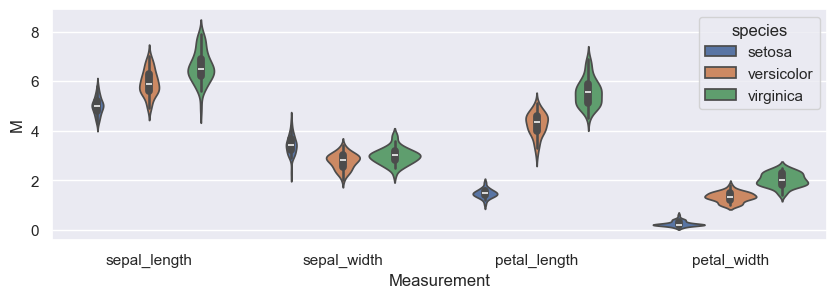

In [23]:
fig, axes = plt.subplots(figsize=(10,3))
sns.violinplot(data=df2, x='Measurement', y='M', hue='species')
plt.show()